### ANUSHA KASA
#### Machine Learning Supervised: KNN
#### Supervised Learning Workflow

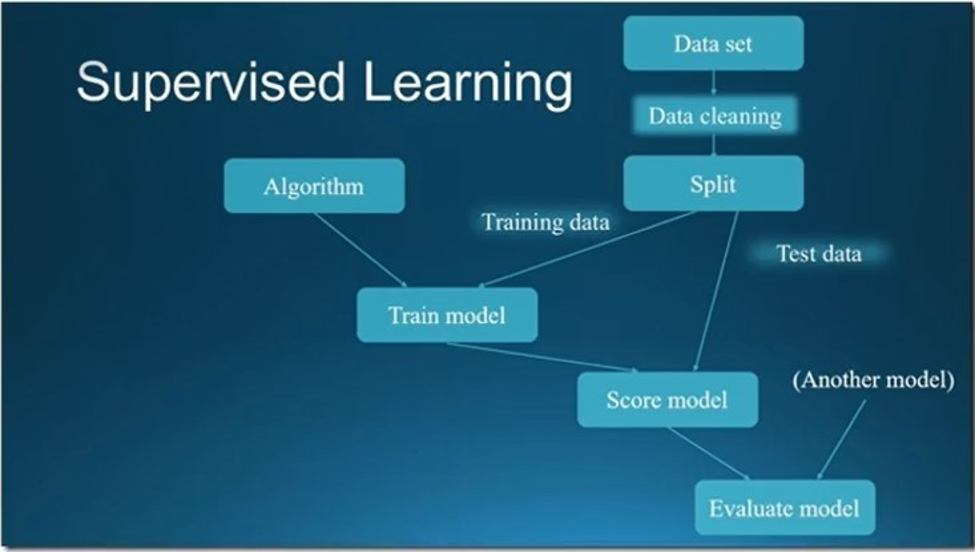

##### K-Nearest Neighbors (KNN)
##### .The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.
##### .The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other. You may have heard the old adage, “Birds of a feather flock together.”
##### .An object is classified by a majority vote of its neighbors with the new object being assigned to the class most common among its k nearest neighbors.
##### .K is a positive integer, typically small: k = 3, 5, or 10.
##### .KNN can do multiple (more than two) class predictions.
##### .In binary (two-class) classification problems, it is helpful to choose k to be an odd number as this can avoid a tie vote.

### Import Python Libraries: Numpy, Pandas, Matplotlib, and sklearn

In [1]:
# Import Python Libraries: NumPy and Pandas
import pandas as pd
import numpy as np

# Import Libraries & modules for data visualization
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

# Import scikit-Learn module for the algorithm/modeL: Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Import scikit-Learn module to split the dataset into train/ test sub-datasets
from sklearn.model_selection import train_test_split

# Import scikit-Learn module for K-fold cross-validation - algorithm/modeL evaluation & validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Import scikit-Learn module classification report to later use for information about how the system try to classify / lable each record
from sklearn.metrics import classification_report

### Description Iris Dataset
###### Data Set: Iris.csv Title: Iris Plants Database Updated Sept 21 by C. Blake -Added discrepancy information Sources:

###### Creator: RA_ Fisher
###### Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
###### Date: 1988
###### Relevant Information: This is perhaps the best-known database to be found in the pattern recognition literature. Fishers paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example)

###### The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.

###### Predicted attribute: class of iris plant

###### Number of Instances: 150 (50 in each of three classes)

###### Number of predictors: 4 numeric, predictive attributes and the class Attribute Information:

###### 1.sepal length in cm
###### 2.sepal width in cm
###### 3.petal length in cm
###### 4.petal width in cm
###### 5.class:

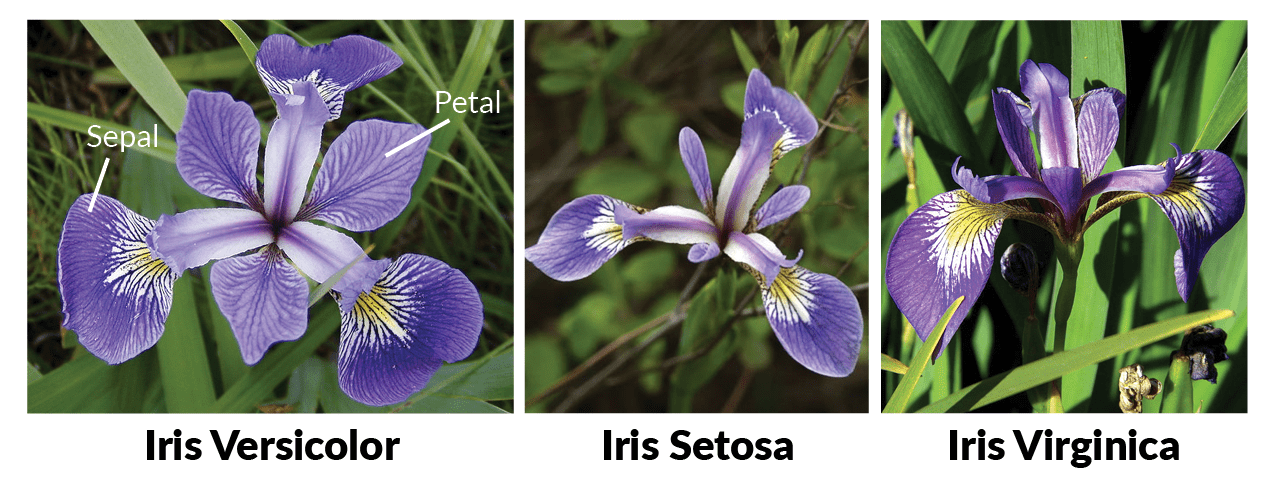

#### Load Iris Dataset

In [2]:
# Specify location of the dataset
filename = 'C:/Users/kasaa/Downloads/Iris (3).csv'
# Load the data into a Pandas DataFrame
df = pd.read_csv(filename)

##### Preprocess the Dataset: Clean Data: Find & Mark Missing Values

In [3]:
# mark zero values as missing or NaN
df[[ 'SepalLengthCm' , 'SepalWidthCm' , 'PetalLengthCm' ,'PetalWidthCm' ]] \
= df[['SepalLengthCm' , 'SepalWidthCm' ,'PetalLengthCm' , 'PetalWidthCm' ]].replace(0,np.NaN)
# count the number of NaN values in each column
print (df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


##### Perform the EDA on the dataset

In [4]:
# get the dimensions or shape of the dataset
# i.e. number of records / rows X number of variables / columns
print(df.shape)

(150, 6)


In [5]:
#get the data types of all the variables / attributes in the data set
print(df.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [6]:
#return the first five records / rows of the data set
print(df.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [7]:
#return the summary statistics of the numeric variables / attributes in the data set
print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [8]:
#class distribution i.e. how many records are in each class
print(df.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


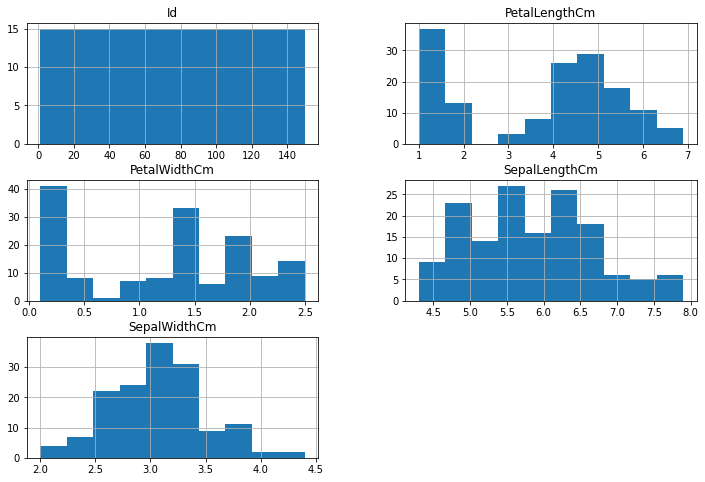

In [9]:
#plot histogram of each numeric variable / attribute in the data set
df.hist(figsize=(12, 8))
pyplot.show()

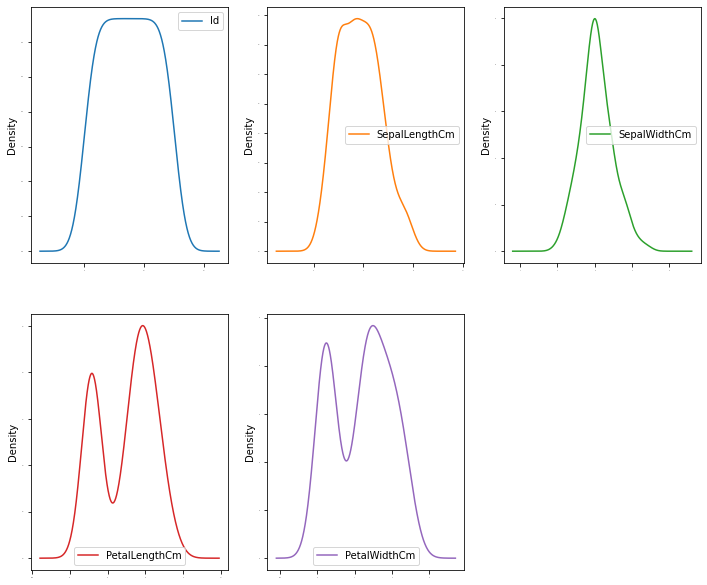

In [10]:
# generate density plots of each numeric variable / attribute in the data set
df.plot(kind='density', subplots=True, layout=(3, 3), sharex=False, legend=True, fontsize=1,
figsize=(12, 16))
pyplot.show()

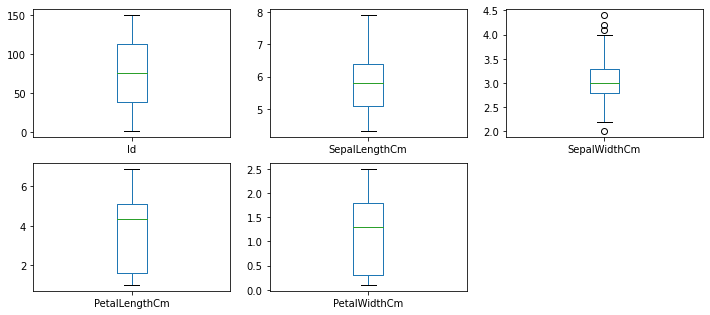

In [11]:
# generate box plots of each numeric variable / attribute in the data set
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, figsize=(12,8))
pyplot.show()

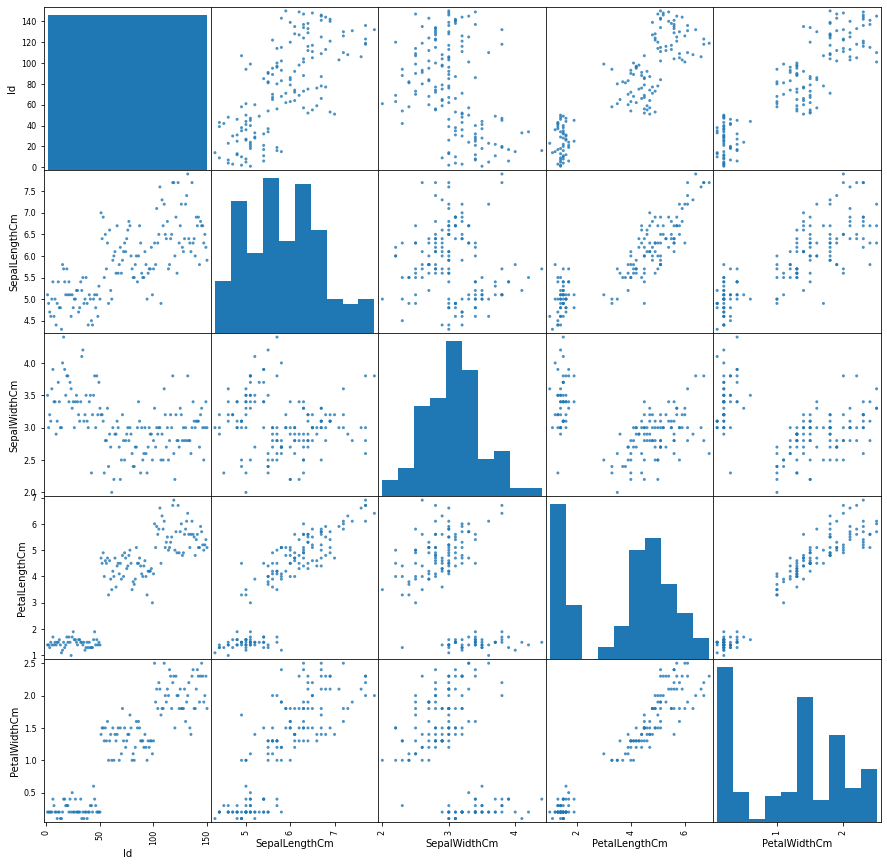

In [12]:
# generate scatter plot matrix of each numeric variable / attribute in the data set
scatter_matrix(df, alpha=0.8, figsize=(15, 15))
pyplot.show()

#### Separate Dataset into Input & Output NumPy Arrays

In [13]:
# store dataframe values into a numpy array

array = df.values

# separate array into input and output by slicing
# for X(input) [:, 1:5] --> all the rows, columns from 1 - 5 
# these are the independent variables or predictors

#X = array[:,1:5]
# X takes all columns except ID and species columns
X = df.drop(['Id','Species'],axis=1)


# for Y(input) [:, 5] --> all the rows, column 5
# this is the value we are trying to predict

#Y = array[:,5]
# Y takes species column
Y = df['Species']

###### Split Input/Output Arrays into Training/Testing Datasets

In [14]:
# split the dataset --> training sub-dataset: 67%; test sub-dataset: 33%
test_size = 0.33
#selection of records to include in each data sub-dataset must be done randomly
seed = 7
#split the dataset (input and output) into training / test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

### Build and Train the Model
Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. 
Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to all observations in the actual class.

Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar costs. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. 

F1 Score = 2(Recall Precision) / (Recall + Precision)

In [15]:
#build the model
model = KNeighborsClassifier()
# train the model using the training sub-dataset
model.fit(X_train, Y_train)
#print the classification report
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print("Classification Report: ", "\n", "\n", report)

Classification Report:  
 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.85      0.94      0.89        18
 Iris-virginica       0.94      0.83      0.88        18

       accuracy                           0.92        50
      macro avg       0.93      0.93      0.93        50
   weighted avg       0.92      0.92      0.92        50



#### Score the Accuracy of the Model
Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost the same. Therefore, you have to look at other parameters to evaluate the performance of your model. 

In [16]:
#score the accuracy leve
result = model.score(X_test, Y_test)
#print out the results
print(("Accuracy: %.3f%%") % (result*100.0))

Accuracy: 92.000%


##### Classify/Predict the Model

In [17]:
model.predict([[5.3, 3.0, 4.5, 1.5]])

array(['Iris-versicolor'], dtype=object)

#### Evaluate the model using the 10-fold cross-validation technique.

In [18]:
# evaluate the algorythm
# specify the number of time of repeated splitting, in this case 10 folds
n_splits = 10

# fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7

# split the whole dataset into folds
# In k-fold cross-validation, the original sample is randomly partitioned into k equal sized
#subsamples. Of the k subsamples, a single subsample is retained as the validation data for
#testing the model, and the remaining k − 1 subsamples are used as training data. 
#The crossvalidation process is then repeated k times, with each of the k subsamples used exactly once as the validation data.
#The k results can then be averaged to produce a single estimation. 
#The advantage of this method over repeated random sub-sampling is that all observations are used for
#both training and validation, and each observation is used for validation exactly once
kfold = KFold(n_splits, random_state=seed, shuffle=True)

# for logistic regression, we can use the accuracy level to evaluate the model / algorithm
scoring = 'accuracy'

# train the model and run K-fold cross validation to validate / evaluate the model
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

# print the evaluationm results
# result: the average of all the results obtained from the K-fold cross validation
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.953 (0.052)


In comparison of accuracies logistic regression algorithm is more accurate which is 96% than KNN accuracy which is 92%